밤하늘과 우주 혹은 관련 사물을 떠올리게 하는 곡
===
일단 rough 하게 서로 특징을 비교해보고, 시각화 결과를 보면서 정밀도를 높이는 방법과 분석에의 활용 방안을 고민해보기로 했다.

In [70]:
import librosa, librosa.display, librosa.feature
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import sklearn
f = open("celestial.csv")

In [ ]:
"""
meteor, sr = librosa.load(mp3file, sr=90, offset=10.357, duration=15.348)
time = np.linspace(10.357, 15.348, 1382) # time axis
fig, ax1 = plt.subplots() # plot
ax1.plot(time, meteor, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title(file_id) # 제목
#plt.savefig(file_id+'.png')
plt.show()
"""

## 1. 음원 파일 전처리 및 대표 음원 구간 생성

In [ ]:
"""
#sound = AudioSegment.from_mp3("mikrokosmos.mp3")
#sound.export("mikrokosmos.wav", format="wav")
sound = AudioSegment.from_mp3("meteor.mp3")
sound.export("meteor.wav", format="wav")
sound = AudioSegment.from_mp3("magicshop.mp3")
sound.export("magicshop.wav", format="wav")
sound = AudioSegment.from_mp3("thefeeling.mp3")
sound.export("thefeeling.wav", format="wav")
sound = AudioSegment.from_mp3("askyfullofstars.mp3")
sound.export("askyfullofstars.wav", format="wav")
sound = AudioSegment.from_mp3("bluemoon_inst.mp3")
sound.export("bluemoon_inst.wav", format="wav")
sound = AudioSegment.from_mp3("heavenisaplace.mp3")
sound.export("heavenisaplace.wav", format="wav")
sound = AudioSegment.from_mp3("rewritethestars_inst.mp3")
sound.export("rewritethestars_inst.wav", format="wav")
"""

In [6]:
mikrokosmos, sr = librosa.load('mikrokosmos.wav', sr=44100, duration=4.294)
#얘도 inst 음원으로 바꾸기
magicshop, sr = librosa.load('magicshop.wav', sr=44100, offset=220.426, duration=5.841)
asfos, sr = librosa.load('askyfullofstars.wav', sr=44100, offset=7.741, duration=7.776)
bluemoon, sr = librosa.load('bluemoon_inst.wav', sr=44100, duration=19.118)
# 얘도 inst 음원으로 바꾸기
feeling, sr = librosa.load('thefeeling.wav', sr=44100, duration=9.538)
heaven, sr = librosa.load('heavenisaplace.wav', sr=44100, offset=40.837, duration=8.165)
rewrite, sr = librosa.load('rewritethestars_inst.wav', sr=44100, offset= 16.02, duration=7.728)
#librosa.display.waveplot(mikrokosmos, sr)

## 2. Feature Extraction
### **1) Spectral features**
#### (1) short time fourier transform => power spectrogram (Magnitude scaling)
* **STFT(short time fourier transform)란?**<br>
데이터에서 시간에 대해 구간을 짧게 나누어 나누어진 여러 구간의 데이터를 각각 푸리에 변환하는 방법. 자동차의 가속신호, transient 신호처럼 시간에 따라 특성이 변하는 신호를 분석하는데 사용된다.<br>**이를 하는 이유를 알 수 있는 내용을 추가하자.**

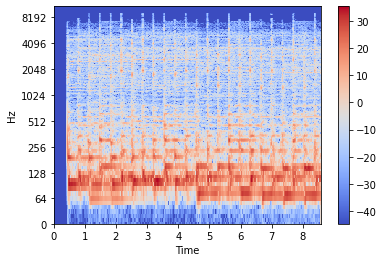

In [8]:
mikrokosmos_sftf = np.abs(librosa.stft(mikrokosmos))
librosa.display.specshow(librosa.amplitude_to_db(mikrokosmos_sftf), x_axis='time', y_axis='log')
plt.colorbar()

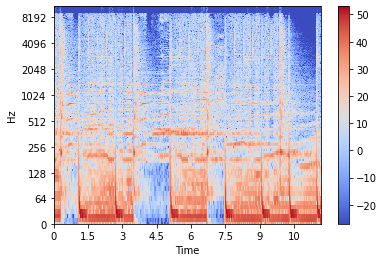

In [10]:
magicshop_stft = np.abs(librosa.stft(magicshop))
librosa.display.specshow(librosa.amplitude_to_db(magicshop_stft), x_axis='time', y_axis='log')
plt.colorbar()

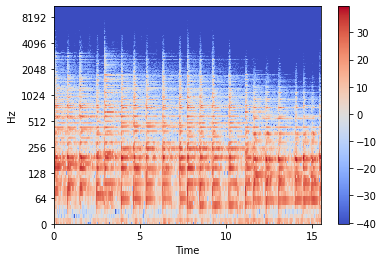

In [12]:
asfos_stft = np.abs(librosa.stft(asfos))
librosa.display.specshow(librosa.amplitude_to_db(asfos_stft), x_axis='time', y_axis='log')
plt.colorbar()

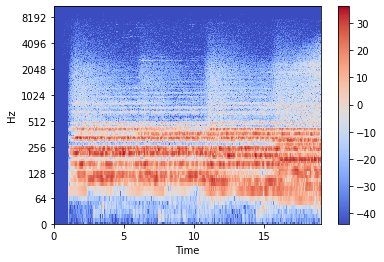

In [14]:
feeling_stft = np.abs(librosa.stft(feeling))
librosa.display.specshow(librosa.amplitude_to_db(feeling_stft), x_axis='time', y_axis='log')
plt.colorbar()

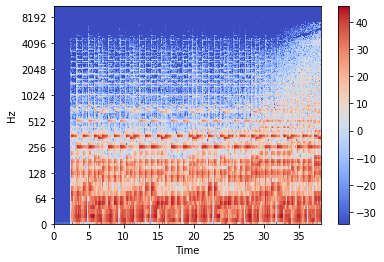

In [16]:
bluemoon_stft = np.abs(librosa.stft(bluemoon))
librosa.display.specshow(librosa.amplitude_to_db(bluemoon_stft), x_axis='time', y_axis='log')
plt.colorbar()

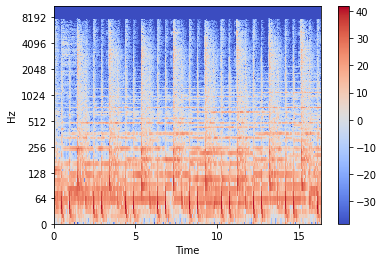

In [18]:
heaven_stft = np.abs(librosa.stft(heaven))
librosa.display.specshow(librosa.amplitude_to_db(heaven_stft), x_axis='time', y_axis='log')
plt.colorbar()

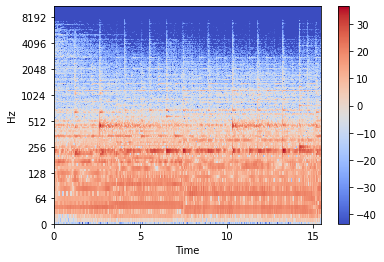

In [20]:
rewrite_stft = np.abs(librosa.stft(rewrite))
librosa.display.specshow(librosa.amplitude_to_db(rewrite_stft), x_axis='time', y_axis='log')
plt.colorbar()

#### (2) Mel-scale spectrogram
사람의 가청 주파수인 8000Hz 이하의 주파수에 대해서만 scaling하여 spectrogram을 만드는 것.

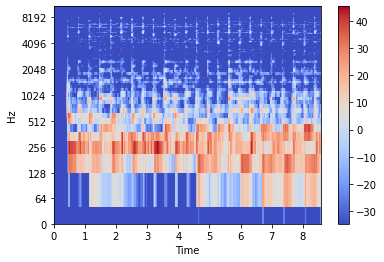

In [22]:
mikrokosmos_mel = librosa.feature.melspectrogram(S=mikrokosmos_sftf**2)
librosa.display.specshow(librosa.amplitude_to_db(mikrokosmos_mel), x_axis='time', y_axis='log')
plt.colorbar()

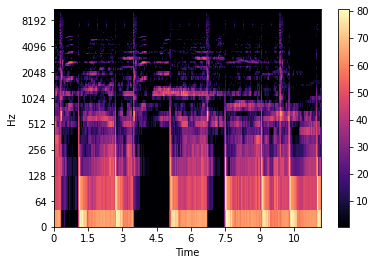

In [24]:
magicshop_mel = librosa.feature.melspectrogram(S=magicshop_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(magicshop_mel), x_axis='time', y_axis='log')
plt.colorbar()

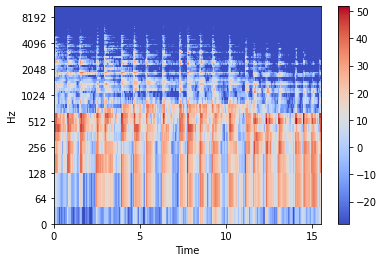

In [26]:
asfos_mel = librosa.feature.melspectrogram(S=asfos_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(asfos_mel), x_axis='time', y_axis='log')
plt.colorbar()

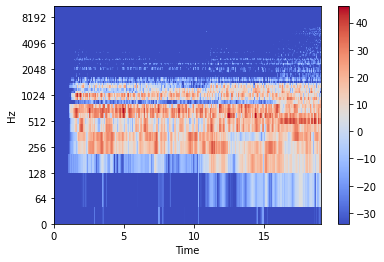

In [28]:
feeling_mel = librosa.feature.melspectrogram(S=feeling_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(feeling_mel), x_axis='time', y_axis='log')
plt.colorbar()

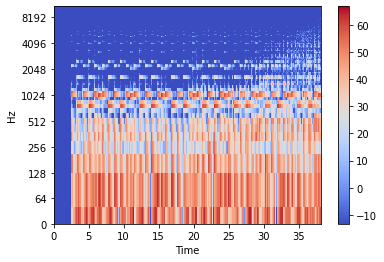

In [30]:
bluemoon_mel = librosa.feature.melspectrogram(S=bluemoon_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(bluemoon_mel), x_axis='time', y_axis='log')
plt.colorbar()

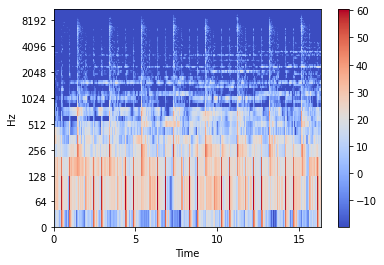

In [32]:
heaven_mel = librosa.feature.melspectrogram(S=heaven_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(heaven_mel), x_axis='time', y_axis='log')
plt.colorbar()

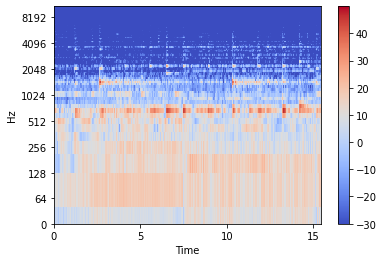

In [34]:
rewrite_mel = librosa.feature.melspectrogram(S=rewrite_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(rewrite_mel), x_axis='time', y_axis='log')
plt.colorbar()

#### (3) Energy

In [65]:
hop_length = 256
frame_length = 512
energy = np.array([
    sum(abs(asfos[i:i+frame_length]**2))
    for i in range(0, len(asfos), hop_length)
])
energy.shape
# 채워넣을 부분
f.write()

(1340,)

In [66]:
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

#### (4) spectral centroid

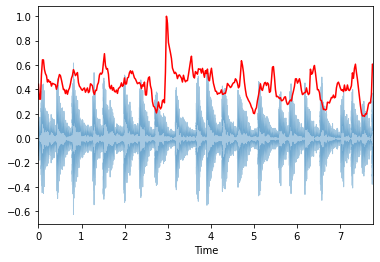

In [75]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

spectral_centroids = librosa.feature.spectral_centroid(asfos, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
 # normalize for visualization purposes
librosa.display.waveplot(asfos, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

### 2) Tempo Features(Tempogram)
#### (1) Novelty Function

In [57]:
hop_length = 200 # samples per frame
# !!!"n0,1 수정"!!!
n0 = 100
n1 = 500

Text(0.5, 1.0, 'Novelty Function')

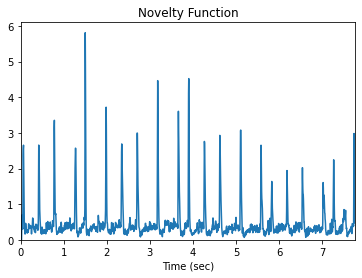

In [38]:
asfos_onset_env = librosa.onset.onset_strength(asfos, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(asfos_onset_env))
asfos_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(asfos_t, asfos_onset_env)
plt.xlim(0, asfos_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

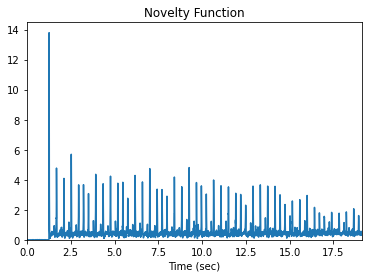

In [40]:
bluemoon_onset_env = librosa.onset.onset_strength(bluemoon, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(bluemoon_onset_env))
bluemoon_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(bluemoon_t, bluemoon_onset_env)
plt.xlim(0, bluemoon_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

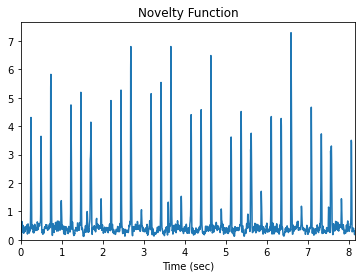

In [42]:
heaven_onset_env = librosa.onset.onset_strength(heaven, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(heaven_onset_env))
heaven_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(heaven_t, heaven_onset_env)
plt.xlim(0, heaven_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

Text(0.5, 1.0, 'Novelty Function')

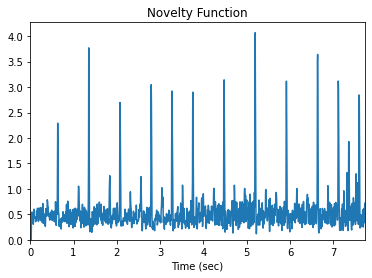

In [44]:
rewrite_onset_env = librosa.onset.onset_strength(rewrite, sr=sr, hop_length=hop_length, n_fft=2048)
# Plot the onset envelope
frames = range(len(rewrite_onset_env))
rewrite_t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(rewrite_t, rewrite_onset_env)
plt.xlim(0, rewrite_t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

#### (2) Fourier Tempogram

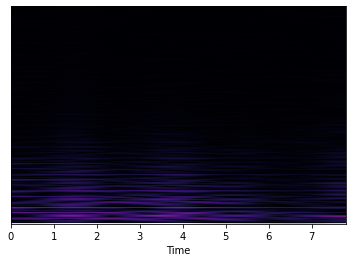

In [46]:
S = librosa.stft(asfos_onset_env, hop_length=1, n_fft=512)
asfos_fourier_tempogram = np.absolute(S)
librosa.display.specshow(asfos_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')

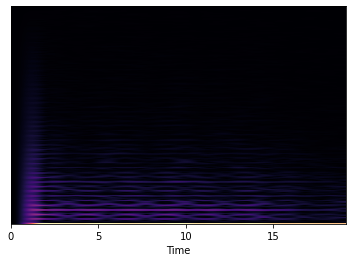

In [48]:
S = librosa.stft(bluemoon_onset_env, hop_length=1, n_fft=512)
bluemoon_fourier_tempogram = np.absolute(S)
librosa.display.specshow(bluemoon_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')

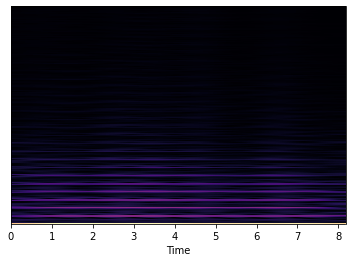

In [50]:
S = librosa.stft(heaven_onset_env, hop_length=1, n_fft=512)
heaven_fourier_tempogram = np.absolute(S)
librosa.display.specshow(heaven_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')

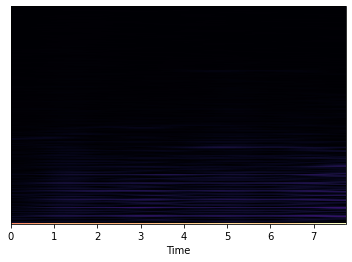

In [52]:
S = librosa.stft(rewrite_onset_env, hop_length=1, n_fft=512)
rewrite_fourier_tempogram = np.absolute(S)
librosa.display.specshow(rewrite_fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')

#### (3) Autocorrelation Tempogram

Text(0.5, 1.0, 'Novelty Function')

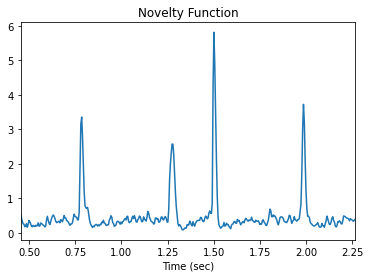

In [53]:
plt.plot(asfos_t[n0:n1], asfos_onset_env[n0:n1])
plt.xlim(asfos_t[n0], asfos_t[n1])
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

In [59]:
tmp = np.log1p(heaven_onset_env[n0:n1])
r = librosa.autocorrelate(tmp)
plt.plot(t[:n1-n0], r)
plt.xlim(t[0], t[n1-n0])
plt.xlabel('Lag (sec)')
plt.ylim(0)

NameError: name 't' is not defined